**預計項目**

- 長條圖
 1. 104 年起火原因排行 
 2. 各縣市平均報案到抵達所花時間(box fig)
  
- 熱度圖
 1. 各縣市 x 原因
 2. 各縣市 x 報案時間
 3. 
  
- 地圖
 1. 縱火案件數
 2. 縱火案件數/火災案件數
 3. 縱火案件數/人口數
 4. 縱火案件數/人口密度
 5. 縱火案件數/公司行號數目



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import geopandas as gp
from IPython.display import Markdown, display
plt.rcParams['figure.dpi'] = 300

## 方便 markdown 寫作使用

In [60]:
def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
#     display(Markdown(df_formatted.to_csv to_csv(sep="|", index=False)))
    return df_formatted.to_csv(sep="|", index=False)

# 讀取台灣地圖資料
### 欄位
COUNTYCODE, COUNTYID, COUNTYNAME, TOWNCODE, TOWNENG, TOWNID, TOWNNAME, geometry

In [2]:
#全台灣村里界圖
taiwan_villages_shp = gp.read_file("../GeoPandas_GettingStart/town_shp/TOWN_MOI_1060525.shp")

In [3]:
#全台灣鄉鎮市區界圖
taiwan_town_shp = taiwan_villages_shp.dissolve('TOWNID', as_index=False)
taiwan_town_shp

,TOWNID,geometry,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNNAME
0,A01,"POLYGON ((121.5697062800001 25.07629222800006,...",63000,A,臺北市,63000010,Songshan District,松山區
1,A02,"POLYGON ((121.543841724 25.04490669700004, 121...",63000,A,臺北市,63000030,Daan District,大安區
2,A03,"POLYGON ((121.5134137450001 25.04939843500006,...",63000,A,臺北市,63000050,Zhongzheng District,中正區
3,A05,"POLYGON ((121.5052060700001 25.04949036400006,...",63000,A,臺北市,63000070,Wanhua District,萬華區
4,A09,"POLYGON ((121.5141047090001 25.07941577800005,...",63000,A,臺北市,63000060,Datong District,大同區
5,A10,"POLYGON ((121.5414663030001 25.09287088400004,...",63000,A,臺北市,63000040,Zhongshan District,中山區
6,A11,"POLYGON ((121.5972524900001 25.01438526800007,...",63000,A,臺北市,63000080,Wenshan District,文山區
7,A13,"POLYGON ((121.614250201 25.06451252200009, 121...",63000,A,臺北市,63000090,Nangang District,南港區
8,A14,"POLYGON ((121.5935900530001 25.11514551600004,...",63000,A,臺北市,63000100,Neihu District,內湖區
9,A15,"POLYGON ((121.580883371 25.19535329300004, 121...",63000,A,臺北市,63000110,Shilin District,士林區


# 火災事件資料前處理
1. 讀取、合併各縣市資料
2. "火災原因"關聯分組
3. "鄉鎮市區" column name 字串替換 & 缺字補充

In [5]:
# 1. 讀取、合併各縣市資料

# 建立各縣市火災檔案清單
list_xls_file = []
floder_path = '104年火災事件資料/'
for i in os.listdir(floder_path):
    list_xls_file.append(floder_path+i)
      
# 合併各縣市火災資料
df_taiwan_fire_event = pd.DataFrame()
for xls in list_xls_file:
    df = pd.read_excel(
                  xls, #list_xls_file[3],
                  skiprows=[0] #這份文件的 row1 不是 index，是文件名稱，所以要跳過
    )
    #print('{} 案件數量={}, '.format(df_taiwan_fire_event['縣市'].unique(), df_taiwan_fire_event.index.size), end='')
    df_taiwan_fire_event = pd.concat([df_taiwan_fire_event, df])

In [6]:
# 2. "火災原因"關聯分組

# 火災事件關聯分組表
dict_fire_event = {
    '自殺':['自殺','自焚'],
    '蠟燭':['蠟燭','燈燭'],
    '縱火':['縱火','疑似縱火','人為縱火'],
    '瓦斯':['瓦斯','瓦斯外洩','瓦斯漏氣或爆炸','洩漏液化石油氣','洩漏液化瓦斯','瓦斯漏氣爆炸','瓦斯灌充填打火機不慎'],
    '機械設備':['機械設備','機械故障'],
    '電氣因素':['電氣因素','電氣因素(不含車輛)'],
    '乾燥作業':['乾燥作業','烘乾機作業不慎','烤火'],
    '敬神祭祖':['敬神祭祖','敬神、祭祖','敬神','祭祖'],
    '爐火烹調':['爐火烹調','爐火不慎','爐火烹調油鍋起火','爐火烹調乾燒'],
    '車輛因素':['車輛因素','車輛電氣因素','車輛機械因素','引擎排煙管高溫','車輛人為疏忽','車輛電氣系統','車輛燃料系統',],
    '燃燒廢棄物':['燃燒廢棄物','燃燒雜草、垃圾','自清','燒廢料','燃燒木材不慎','整地','引燃汽油','引燃枯草'],
    '燃放爆竹煙火':['燃放爆竹','燃放爆竹煙火','施放爆竹煙火'],
    '易燃液體接觸火源':['易燃液體接觸火源','易燃品自燃','化學物品','柴油洩漏接觸熱源','絕緣油接觸高溫','易燃液體'],
    '其他或不明':['其他或不明','其他','其它','原因不明','不明']
}

print("原先所有類別數量 = {}".format(len(df_taiwan_fire_event['起火原因'].unique())))

# 關聯分組字串替換
for key in dict_fire_event:
    df_taiwan_fire_event['起火原因'].replace(
        to_replace = dict_fire_event[key],
        value = key, inplace=True)

df_fire_cause_count = df_taiwan_fire_event.groupby(by = ['起火原因'], squeeze = True).count()
df_fire_cause_count.iloc[:,0:1].sort_values(
                    by = df_fire_cause_count.columns[0],
                    ascending = False)
print("關聯分組類別數量 = {}".format(len(df_fire_cause_count.index.unique())))
print(df_fire_cause_count.index.values)

原先所有類別數量 = 62
關聯分組類別數量 = 25
['乾燥作業' '交通事故' '其他或不明' '天然災害' '敬神掃墓祭祖' '敬神祭祖' '施工不慎' '易燃液體接觸火源' '機械設備'
 '汙泥過熱' '燃放爆竹煙火' '燃燒廢棄物' '爐火烹調' '玩火' '瓦斯' '縱火' '自殺' '菸蒂' '蠟燭' '車輛因素' '遺留火種'
 '除蜂不慎' '電暖器引燃可燃物' '電氣因素' '點蚊香不慎引火']


In [7]:
# 3. "鄉鎮市區" column name 字串替換 & 缺字補充

#'鄉、鎮、市、區'不能 query
df_taiwan_fire_event.rename_axis({'鄉、鎮、市、區':'鄉鎮市區'}, axis=1, inplace=True)

dict_TOWNNAME = {
    '中山區':['中山區','中山'],
    '七堵區':['七堵區','七堵'],
    '中正區':['中正區','中正'],
    '仁愛區':['仁愛區','仁愛'],
    '信義區':['信義區','信義'],
    '安樂區':['安樂區','安樂'],
    '暖暖區':['暖暖區','暖暖'],
    '臺西鄉':['臺西鄉','臺西','台西鄉','台西'],
}

for key in dict_TOWNNAME:
    df_taiwan_fire_event['鄉鎮市區'].replace(
            to_replace = dict_TOWNNAME[key],
            value = key, inplace=True)

In [79]:
# df_taiwan_fire_event.query('鄉鎮市區=="大甲區"')
# taiwan_town_shp.query('TOWNNAME=="大甲區"')
print("鄉鎮市區總數 = {}".format(taiwan_town_shp.index.size))

鄉鎮市區總數 = 368


In [9]:
# 求兩個資料集的差異
set(
    df_taiwan_fire_event['鄉鎮市區'].unique()
).difference(set(taiwan_town_shp['TOWNNAME']))

{'台南市南區鯤鯓湖南側水道(CTR-CI0031舢舨)',
 '高雄市前鎮漁港(益大68號)',
 '高雄市旗津區德利造船廠(CERIBU漁船)',
 '高雄港121號碼頭(華維1號貨輪)',
 '高雄港32號碼頭(編號10-8號堆高機)',
 '高雄港78號碼頭(編號601號堆高機)'}

## 資前處理和檢查完成

In [ ]:
# df_taiwan_fire_event.sort_values(by='受傷人數', ascending=False)
# taiwan_town_shp[['COUNTYNAME','TOWNNAME']]
# pd.Series(index = df_taiwan_fire_event['起火原因'].unique(),
#           data  = df_taiwan_fire_event.query('縣市=="臺中市" and 鄉鎮市區=="潭子區"')["起火原因"].value_counts()).fillna(0)

In [ ]:
# df_raw.query('"潭子"鄉鎮市區')
# df_taichug_region1 = df_taiwan_fire_event.query('"大雅區"==鄉鎮市區 or "神岡區"==鄉鎮市區 or "潭子區"==鄉鎮市區 or "豐原區"==鄉鎮市區')

## 全台火災原因排名表

In [80]:
df_fire_event_rank_of_TW = (df_taiwan_fire_event
        .groupby(by=['起火原因']).count().iloc[:,[0]] #計算各原因事件數目
        .rename(columns={'縣市':'數量'}) #體換成合理的 column name
        .sort_values(by=['數量'],ascending=False) #排序
        .T #轉置
    )
display(df_fire_event_rank_of_TW)
# 產生寫文章用的 MD table
pandas_df_to_markdown_table(df_fire_event_rank_of_TW)

起火原因,電氣因素,縱火,其他或不明,菸蒂,遺留火種,爐火烹調,車輛因素,施工不慎,燃燒廢棄物,敬神祭祖,...,交通事故,易燃液體接觸火源,玩火,敬神掃墓祭祖,乾燥作業,汙泥過熱,除蜂不慎,電暖器引燃可燃物,天然災害,點蚊香不慎引火
數量,576,270,164,148,104,72,46,37,31,31,...,18,15,14,14,2,1,1,1,1,1


'電氣因素|縱火|其他或不明|菸蒂|遺留火種|爐火烹調|車輛因素|施工不慎|燃燒廢棄物|敬神祭祖|瓦斯|機械設備|燃放爆竹煙火|自殺|蠟燭|交通事故|易燃液體接觸火源|玩火|敬神掃墓祭祖|乾燥作業|汙泥過熱|除蜂不慎|電暖器引燃可燃物|天然災害|點蚊香不慎引火\n---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---\n576|270|164|148|104|72|46|37|31|31|29|27|26|24|19|18|15|14|14|2|1|1|1|1|1\n'

## （各縣市 X 各種起火原因）數量表

In [10]:
df_town_fire_cause = pd.crosstab(index=[df_taiwan_fire_event['縣市'],
                                        df_taiwan_fire_event['鄉鎮市區']
                                       ],
                                columns=df_taiwan_fire_event["起火原因"])
df_town_fire_cause

起火原因                       乾燥作業  交通事故  其他或不明  天然災害  敬神掃墓祭祖  敬神祭祖  施工不慎  \
縣市  鄉鎮市區                                                                 
南投縣 中寮鄉                       0     1      0     0       0     1     0   
    仁愛鄉                       1     0      1     0       0     0     0   
    信義鄉                       0     0      1     0       0     2     0   
    南投市                       0     0      2     0       0     3     1   
    名間鄉                       0     0      0     0       0     0     0   
    國姓鄉                       0     0      0     0       0     0     0   
    埔里鎮                       0     2      0     0       0     0     0   
    水里鄉                       0     1      0     0       0     2     0   
    竹山鎮                       0     0      1     0       0     0     0   
    草屯鎮                       0     1      0     0       0     2     0   
    集集鎮                       0     0      0     0       0     0     0   
    魚池鄉                       0     0      1     0       0     0     0   
    鹿谷鄉                       0     0      0     0       0     0     0   
嘉義市 東區                        0     0      1     0       0     0     0   
    西區                        0     0      2     0       0     0     0   
嘉義縣 中埔鄉                       0     0      0     0       0     0     0   
    大林鎮                       0     0      1     0       0     0     0   
    太保市                       0     0      1     0       0     0     0   
    布袋鎮                       0     0      0     0       0     0     0   
    新港鄉                       0     0      0     0       0     0     0   
    朴子市                       0     0      0     0       0     0     1   
    東石鄉                       0     0      0     0       0     0     0   
    梅山鄉                       0     0      0     0       0     0     0   
    民雄鄉                       0     0      1     0       0     0     0   
    水上鄉                       0     0      2     0       0     1     0   
    溪口鄉                       0     0      0     0       0     0     0   
    番路鄉                       0     0      0     0       0     0     0   
    竹崎鄉                       0     0      0     0       0     0     0   
基隆市 七堵區                       0     0      1     0       0     0     0   
    中山區                       0     0      2     0       0     0     0   
...                         ...   ...    ...   ...     ...   ...   ...   
高雄市 仁武區                       0     0      0     0       0     0     0   
    內門區                       0     0      0     0       0     0     0   
    前金區                       0     0      0     0       0     0     0   
    前鎮區                       0     0      0     0       0     0     0   
    大寮區                       0     0      0     0       0     0     0   
    大樹區                       0     0      0     0       0     0     0   
    大社區                       0     0      0     0       0     0     0   
    小港區                       0     0      0     0       0     0     1   
    岡山區                       0     0      0     0       0     0     0   
    新興區                       0     0      0     0       0     0     0   
    旗山區                       0     0      0     0       0     0     0   
    林園區                       0     0      0     0       0     0     0   
    梓官區                       0     0      0     0       0     0     0   
    楠梓區                       0     0      0     0       0     0     0   
    永安區                       0     0      0     0       0     0     0   
    湖內區                       0     0      0     0       0     0     0   
    燕巢區                       0     0      0     0       0     0     0   
    美濃區                       0     0      0     0       0     0     0   
    苓雅區                       0     0      0     0       0     0     0   
    茄萣區                       0     0      0     0       0     0     0   
    路竹區                       0     0      0     0       0     0     0   
    

## 各縣市縱火排名表

In [81]:
# 各縣市縱火排名表
df_Arson_rank_by_COUNTYNAME = df_town_fire_cause.groupby(by=['縣市']
                                                        ).sum()[['縱火']].sort_values(
                                                        by=['縱火'], ascending=False)
display(df_Arson_rank_by_COUNTYNAME.T)
pandas_df_to_markdown_table(df_Arson_rank_by_COUNTYNAME.T)

縣市,桃園市,屏東縣,臺南市,臺中市,彰化縣,高雄市,臺北市,嘉義縣,雲林縣,苗栗縣,...,南投縣,宜蘭縣,新竹縣,基隆市,澎湖縣,新竹市,嘉義市,金門縣,臺中港,連江縣
起火原因,,,,,,,,,,,,,,,,,,,,,
縱火,48,38,24,24,17,16,14,13,12,11,...,6,6,5,3,3,2,1,1,0,0


'桃園市|屏東縣|臺南市|臺中市|彰化縣|高雄市|臺北市|嘉義縣|雲林縣|苗栗縣|花蓮縣|新北市|臺東縣|南投縣|宜蘭縣|新竹縣|基隆市|澎湖縣|新竹市|嘉義市|金門縣|臺中港|連江縣\n---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---\n48|38|24|24|17|16|14|13|12|11|10|9|7|6|6|5|3|3|2|1|1|0|0\n'

## 各縣市縱火數量地圖

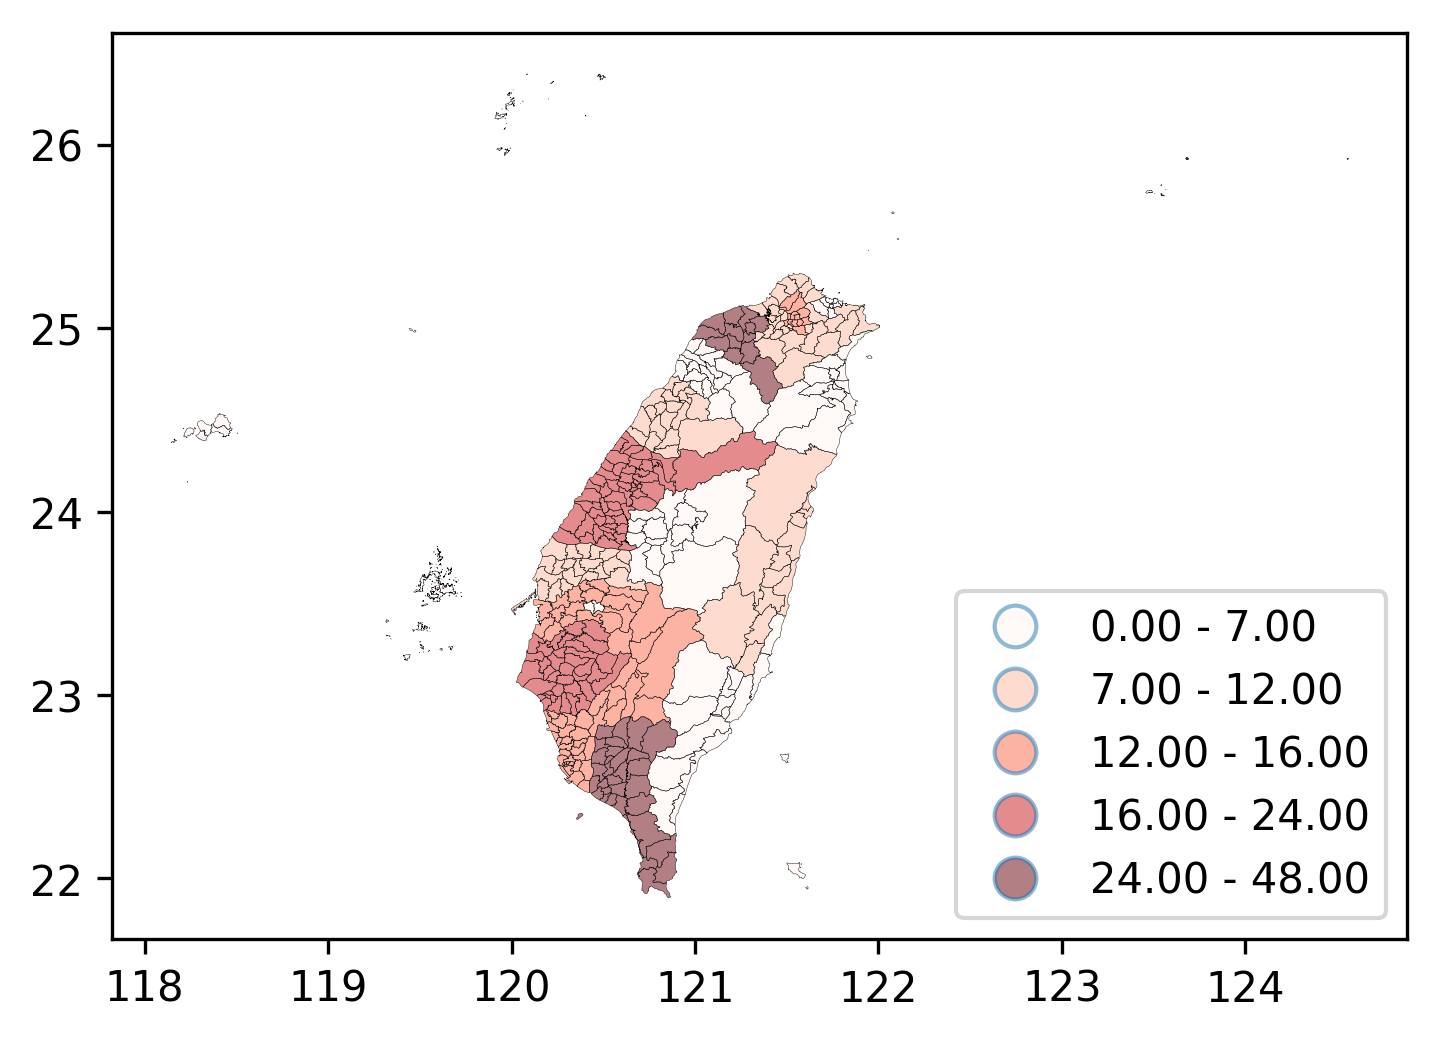

In [19]:
ax = taiwan_town_shp[['COUNTYNAME','geometry']].merge(
                                right = df_Arson_rank_by_COUNTYNAME,
                                left_on = ['COUNTYNAME'],
                                right_index = True,
                                how = 'left'
         ).plot(
            linewidth = 0.1,
            cmap = plt.cm.Reds, #指定顏色
            column = '縱火', #指定從自身的這個 column 讀取顏色深度,
            legend = True, k = 5, scheme = 'Quantiles'
)
plt.show()